# Tempo Estimation
## Audio Libraries
### Librosa

---

#### [librosa.onset.onset_strength](https://librosa.org/doc/main/generated/librosa.onset.onset_strength.html)

```python
librosa.onset.onset_strength(y=None, sr=22050, S=None, lag=1, max_size=1, ref=None, detrend=False, center=True, feature=None, aggregate=None, **kwargs)
```

Compute a spectral flux onset strength envelope. (Typically dominated by the percussion)

---

#### [librosa.beat.tempo](https://librosa.org/doc/main/generated/librosa.beat.tempo.html)

```python
librosa.beat.tempo(y=None, sr=22050, onset_envelope=None, hop_length=512, start_bpm=120, std_bpm=1.0, ac_size=8.0, max_tempo=320.0, aggregate=<function mean>, prior=None)
```

Estimate the tempo (beats per minute) based on the pre-computed onset strength envelope

---

## Setting audio file directory

In [1]:
import os
audio_path = os.path.expanduser('~/FMA/fma_small/fma_small/000/')

## Reading Audio

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
y, sr = librosa.load(audio_path + '000005.mp3', duration=5)
print(y.shape)
print(sr)
ipd.Audio(y, rate=sr)

/home/b073040018/.local/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(110250,)
22050


## Compute onset strength envelope
And compare to the spectrogram (not necessary)

/home/b073040018/.local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/b073040018/.local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/b073040018/.local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


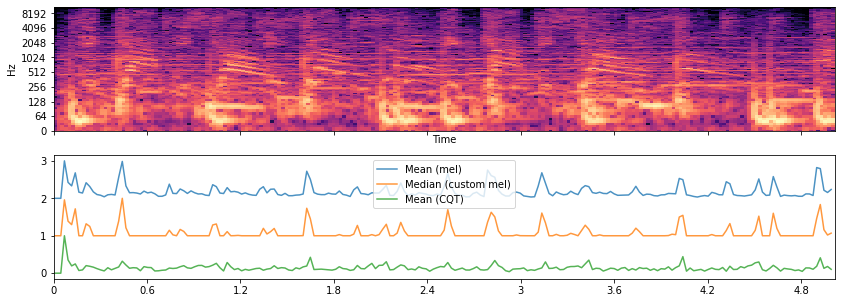

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(14, 5))
# Plot spectrogram
D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])

# Compute onset strength (3 methods)
times = librosa.times_like(D)
# Mean (mel)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8, label='Mean (mel)')

# Median (custom mel)
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8, label='Median (custom mel)')

# Mean (CQT)
C = np.abs(librosa.cqt(y=y, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8, label='Mean (CQT)')
ax[1].legend()

## Estimate Tempo

In [4]:
# Compute onset strength
# Median (custom mel)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Estimate Tempo
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo

array([99.38401442])